<a href="https://colab.research.google.com/github/VasumathiBurugu/sales-forecasting/blob/master/stores_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>














































































































































































































































#importing the libraries







In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# uploading a file


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving stores_sales_forecasting.csv to stores_sales_forecasting (3).csv


# reading a file

In [ ]:
import pandas as pd
import io

# Get the correct file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Read the file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin-1')

# Display the first few rows of the DataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
print(df.describe())

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


# **DATA CLEANING AND PREPROSSING**

In [ ]:
# Convert columns with numeric values to the appropriate data type
df["Sales"] = pd.to_numeric(df["Sales"])

# Fill missing values with the mean of the column for numeric columns only
for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].mean(), inplace=True)
    print(df[col])

0          1
1          2
2          4
3          6
4         11
        ... 
2116    9963
2117    9965
2118    9981
2119    9990
2120    9991
Name: Row ID, Length: 2121, dtype: int64
0       42420
1       42420
2       33311
3       90032
4       90032
        ...  
2116    77041
2117    19711
2118    70506
2119    33180
2120    92627
Name: Postal Code, Length: 2121, dtype: int64
0        261.9600
1        731.9400
2        957.5775
3         48.8600
4       1706.1840
          ...    
2116     383.4656
2117      13.4000
2118      85.9800
2119      25.2480
2120      91.9600
Name: Sales, Length: 2121, dtype: float64
0       2
1       3
2       5
3       7
4       9
       ..
2116    4
2117    1
2118    1
2119    3
2120    2
Name: Quantity, Length: 2121, dtype: int64
0       0.00
1       0.00
2       0.45
3       0.00
4       0.20
        ... 
2116    0.32
2117    0.00
2118    0.00
2119    0.20
2120    0.00
Name: Discount, Length: 2121, dtype: float64
0        41.9136
1       219.5820
2

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean for numeric columns only
for col in df.select_dtypes(include=['number']): # Select numeric columns
    df[col].fillna(df[col].mean(), inplace=True) # Calculate mean for each numeric column

# Consider alternative methods for non-numeric columns
# For example, forward-fill or most frequent value
# df['Order ID'].fillna(method='ffill', inplace=True)
# df['Customer Name'].fillna(df['Customer Name'].mode()[0], inplace=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Detect outliers using the Interquartile Range (IQR) method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers beyond 1.5*IQR
df = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
3          6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
5         24  US-2017-156909   7/16/2017   7/18/2017    Second Class   
...      ...             ...         ...         ...             ...   
2116    9963  CA-2015-168088   3/19/2015   3/22/2015     First Class   
2117    9965  CA-2016-146374   12/5/2016  12/10/2016    Second Class   
2118    9981  US-2015-151435    9/6/2015    9/9/2015    Second Class   
2119    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
2120    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1  

In [ ]:
df.shape

(1957, 21)

In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [ ]:
df= pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [ ]:
print(pd.get_dummies)

<function get_dummies at 0x790f9535e710>


<ipython-input-19-ff68d2ad15df>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(bins)['Sales'].mean().plot(kind='bar', ax=axes[i], color=colors[i])
<ipython-input-19-ff68d2ad15df>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(bins)['Sales'].mean().plot(kind='bar', ax=axes[i], color=colors[i])
<ipython-input-19-ff68d2ad15df>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(bins)['Sa

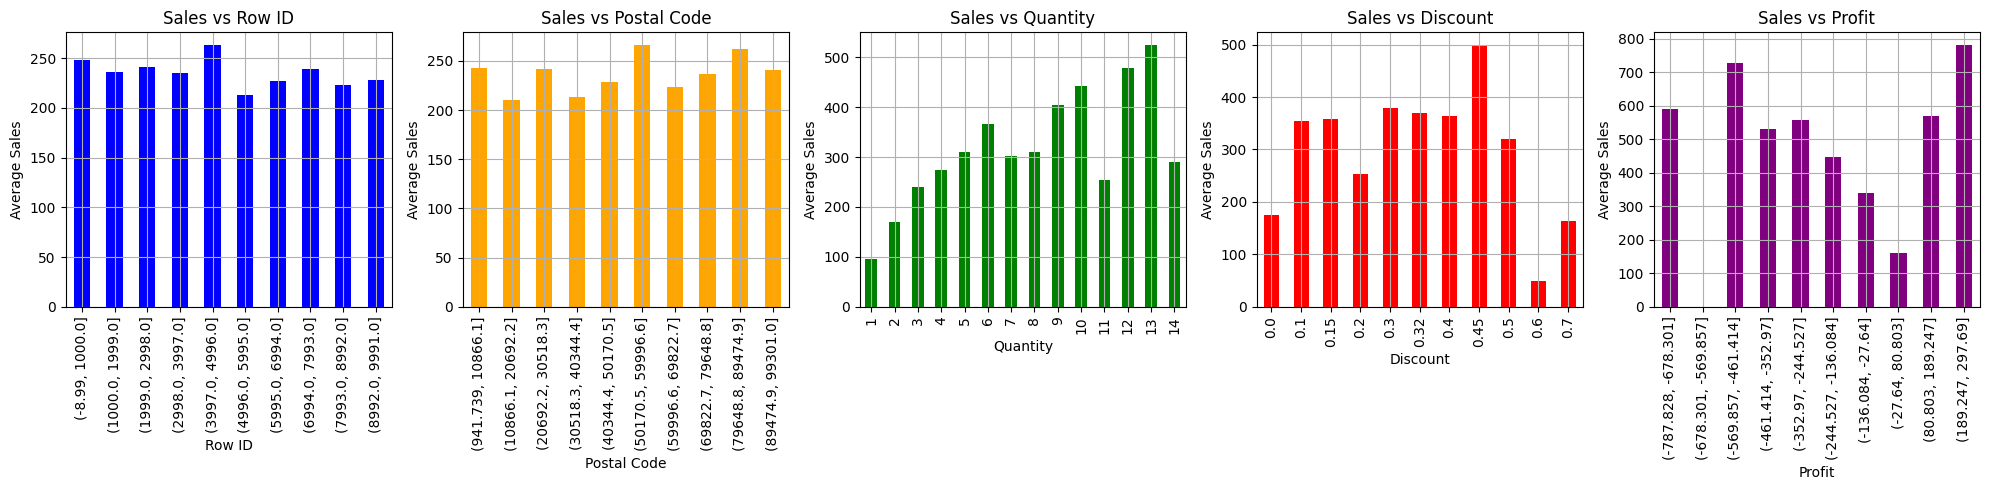

SUMMARIZATION OF THE ABOVE VISUALIZATION:

The resulting visualization provides a clear comparison of how the average Sales varies with each of the other variables.

You can observe trends such as:
1. Whether higher Row ID values correlate with higher or lower average Sales. Note that Row ID is often an identifier and might not have a meaningful relationship.
2. Whether higher Postal Code values correlate with higher or lower average Sales. Postal Code can have a categorical effect on Sales.
3. Whether higher Quantity values correlate with higher or lower average Sales. This can help identify if larger quantities lead to higher sales.
4. Whether higher Discount values correlate with higher or lower average Sales. This can indicate if discounts are affecting Sales.
5. Whether higher Profit values correlate with higher or lower average Sales. This can show if higher profits are associated with higher Sales.

This type of visualization helps you explore potential relationships between you

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded as a DataFrame, replace it with your actual dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment if you have a dataset to load

# Columns to be plotted against 'Sales'
columns_to_plot = ['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit']

# Define different colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create subplots for each column, matching the number of columns_to_plot
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))  # 1 row, multiple columns of plots

# Plotting the bar graph for each column
for i, col in enumerate(columns_to_plot):
    if df[col].dtype == 'object' or df[col].nunique() < 20:  # Categorical data or limited unique values
        df.groupby(col)['Sales'].mean().plot(kind='bar', ax=axes[i], color=colors[i])
    else:  # Numerical data
        # Bin numerical data for better visualization
        bins = pd.cut(df[col], bins=10)  # Adjust number of bins as needed
        df.groupby(bins)['Sales'].mean().plot(kind='bar', ax=axes[i], color=colors[i])

    axes[i].set_title(f'Sales vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Sales')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# Summarization of the visualization
print("SUMMARIZATION OF THE ABOVE VISUALIZATION:")
print("\nThe resulting visualization provides a clear comparison of how the average Sales varies with each of the other variables.")
print("\nYou can observe trends such as:")
print("1. Whether higher Row ID values correlate with higher or lower average Sales. Note that Row ID is often an identifier and might not have a meaningful relationship.")
print("2. Whether higher Postal Code values correlate with higher or lower average Sales. Postal Code can have a categorical effect on Sales.")
print("3. Whether higher Quantity values correlate with higher or lower average Sales. This can help identify if larger quantities lead to higher sales.")
print("4. Whether higher Discount values correlate with higher or lower average Sales. This can indicate if discounts are affecting Sales.")
print("5. Whether higher Profit values correlate with higher or lower average Sales. This can show if higher profits are associated with higher Sales.")
print("\nThis type of visualization helps you explore potential relationships between your data and identify patterns or outliers.")


In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'")


Cleaned dataset saved to 'cleaned_dataset.csv'


In [ ]:
# Load the dataset using the correct key from the 'uploaded' dictionary
# Assuming the key is 'stores_sales_forecasting(1).csv', but it could be different
# Get the correct key from the uploaded dictionary
file_key = list(uploaded.keys())[0]  # Get the first key from the uploaded dictionary

# Print the available keys for confirmation
print(f"Available keys in 'uploaded': {list(uploaded.keys())}")

df = pd.read_csv(io.BytesIO(uploaded[file_key]), encoding='latin-1')  # Use the correct key

# Check the column names
print(df.columns)

Available keys in 'uploaded': ['stores_sales_forecasting (2).csv']
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


#  DATA VISUALIZATION

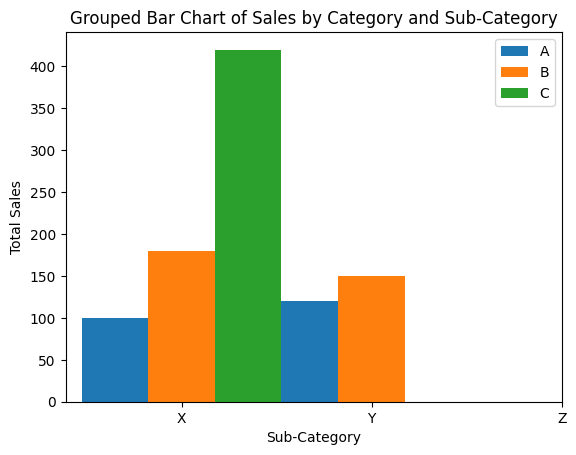

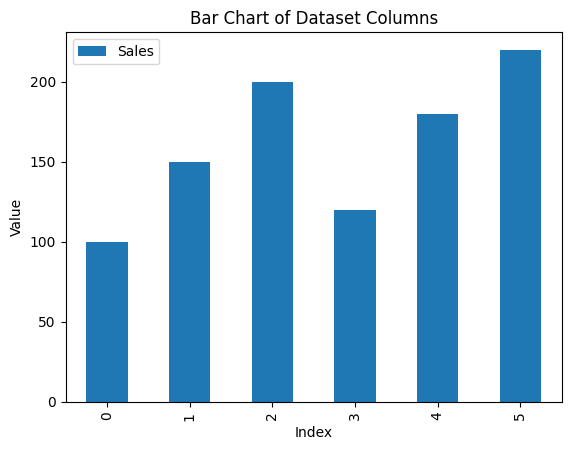

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
data = {'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Sub-Category': ['X', 'Y', 'Z', 'Y', 'X', 'Z'],
        'Sales': [100, 150, 200, 120, 180, 220]}
df = pd.DataFrame(data)

# Grouped bar chart
grouped_data = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
categories = grouped_data['Category'].unique()
sub_categories = grouped_data['Sub-Category'].unique()

bar_width = 0.35
fig, ax = plt.subplots()

for i, cat in enumerate(categories):
    subset = grouped_data[grouped_data['Category'] == cat]
    # Get the x positions for the bars
    x = [j + i * bar_width for j in range(len(subset))] # Change is on this line
    ax.bar(x, subset['Sales'], width=bar_width, label=cat)

ax.set_xticks([i + bar_width / 2 * (len(categories) - 1) for i in range(len(sub_categories))])
ax.set_xticklabels(sub_categories)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Total Sales')
ax.set_title('Grouped Bar Chart of Sales by Category and Sub-Category')
ax.legend()

plt.show()

# Bar chart of dataset columns
df.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Chart of Dataset Columns')
plt.show()

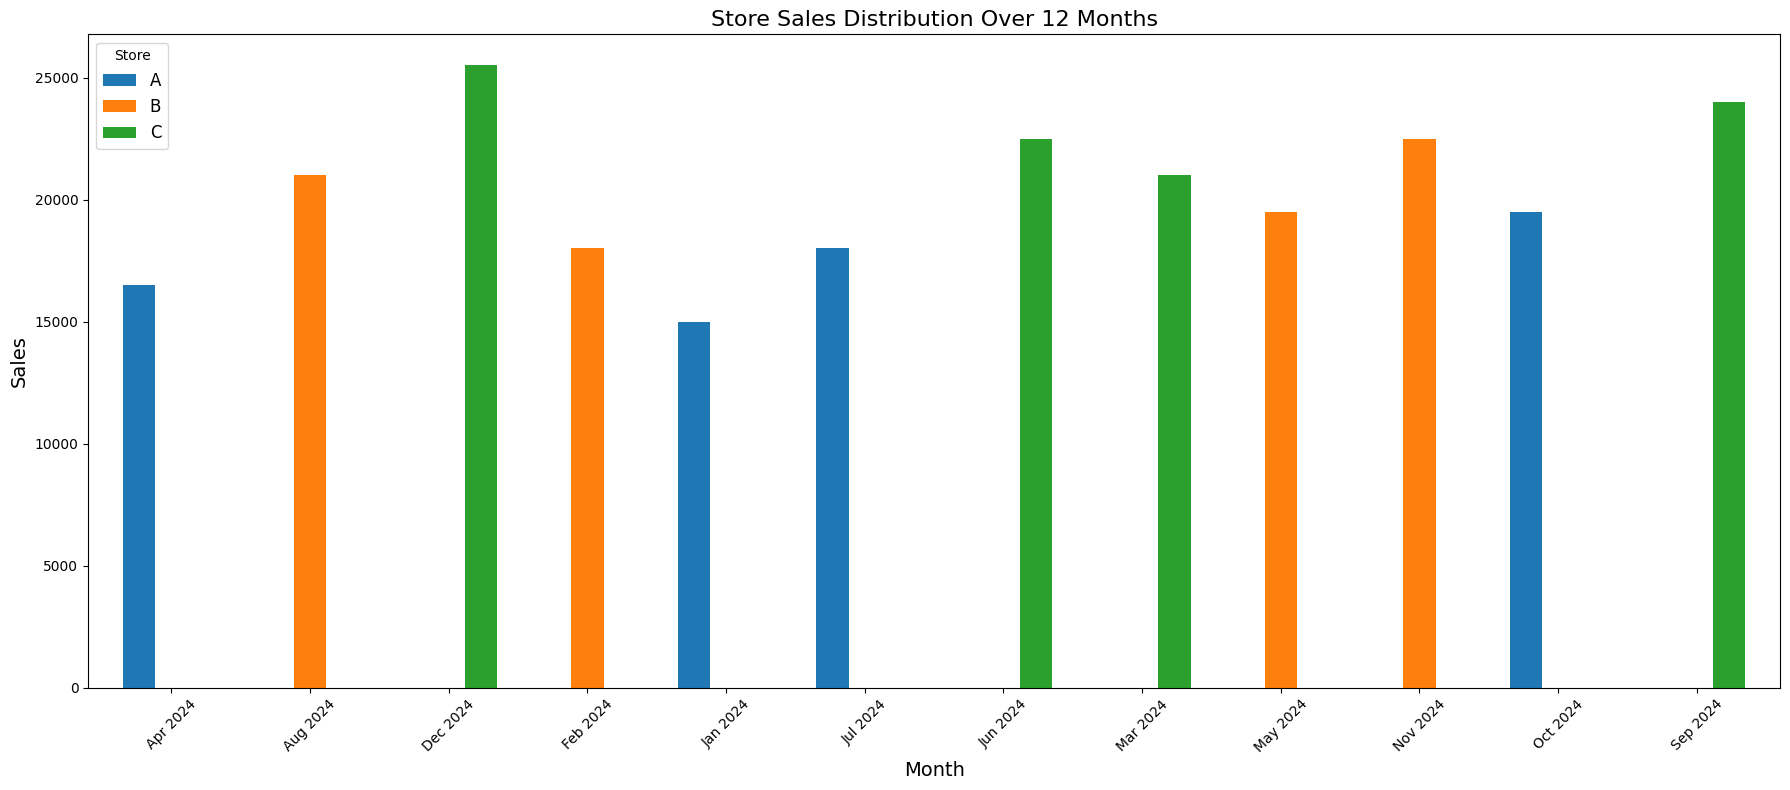

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for 12 months
df = {
    'Store': ['A', 'B', 'C'] * 12,
    'Month': ['Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
              'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'] * 3,
    'Sales': [5000, 6000, 7000, 5500, 6500, 7500, 6000, 7000, 8000, 6500, 7500, 8500] * 3
}

df = pd.DataFrame(df)

# Pivot data for plotting
pivot_df = df.pivot_table(index='Month', columns='Store', values='Sales', aggfunc='sum')

# Plot the bar chart with grouped bars for each month
pivot_df.plot(kind='bar', figsize=(18, 8), width=0.7)

# Adjust labels, title, and legend
plt.title('Store Sales Distribution Over 12 Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Store', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


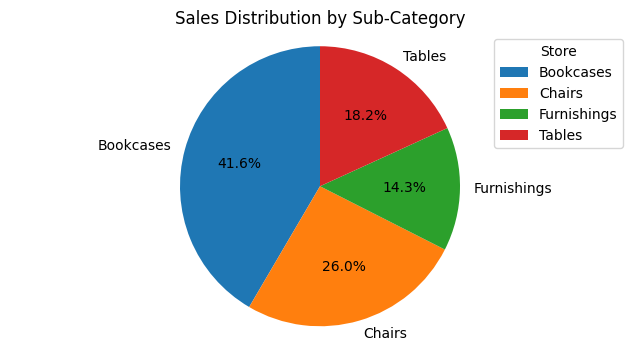

Visual Representation:

 The pie chart will visually represent these proportions, making it easy to see which sub-categories contribute more or less to the overall sales.

The pie chart provides a visual summary of how sales are distributed among different sub-categories.

It shows the relative size of each sub-category's contribution to the total sales, helping to identify which categories are the most or least significant in terms of sales.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
df = {
    'Sub-Category': ['Bookcases', 'Chairs', 'Tables','Furnishings','Bookcases','Chairs', 'Bookcases'],
    'Sales': [5000, 6000, 7000, 5500, 8000, 4000, 3000]
}

df = pd.DataFrame(df)

# Group data by sub-category and sum sales
category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.legend(title='Store')
plt.title('Sales Distribution by Sub-Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("\bVisual Representation:")
print("\n The pie chart will visually represent these proportions, making it easy to see which sub-categories contribute more or less to the overall sales.")
print("\nThe pie chart provides a visual summary of how sales are distributed among different sub-categories.")
print("\nIt shows the relative size of each sub-category's contribution to the total sales, helping to identify which categories are the most or least significant in terms of sales.")

# Marketing Insights: Identify trends in consumer preferences based on region, category, or customer type, which can help in targeted marketing campaigns.

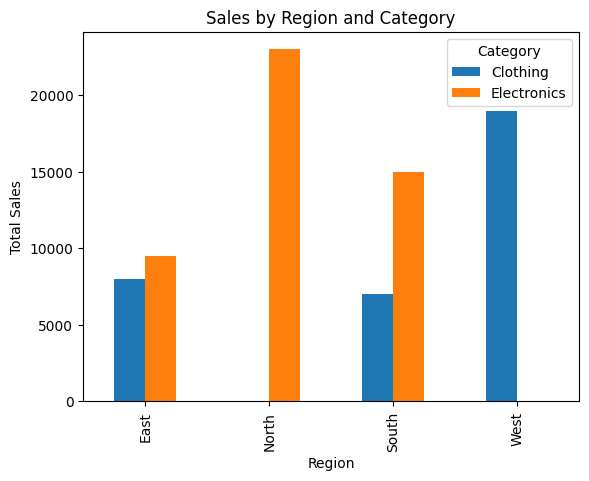

Regional Sales Comparison: 

 The bar chart allows you to compare total sales by category across different regions.

 For example, you can see which region has the highest sales for each category and how categories compare within each region.

 Category Distribution:

 By examining the chart, you can also assess which category contributes more to sales in different regions.

 Specific Insights:

 Electronics vs. Clothing: You can identify if certain regions have higher sales in one category over the other.

 Regional Performance: Analyze the performance of each region by observing the height of the bars for different categories.

 Overall, the bar chart provides a clear, comparative view of how sales are distributed across different regions and categories, helping to identify trends and performance patterns.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df= {
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [12000, 15000, 8000, 9000, 11000, 7000, 9500, 10000]
}

df = pd.DataFrame(df)

# Pivot data for plotting
pivot_df = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')

# Plot
pivot_df.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Category')
plt.legend(title='Category')
plt.show()
print("Regional Sales Comparison: ")
print("\n The bar chart allows you to compare total sales by category across different regions.")
print("\n For example, you can see which region has the highest sales for each category and how categories compare within each region.")
print("\n Category Distribution:")
print("\n By examining the chart, you can also assess which category contributes more to sales in different regions.")
print("\n Specific Insights:")
print("\n Electronics vs. Clothing: You can identify if certain regions have higher sales in one category over the other.")
print("\n Regional Performance: Analyze the performance of each region by observing the height of the bars for different categories.")
print("\n Overall, the bar chart provides a clear, comparative view of how sales are distributed across different regions and categories, helping to identify trends and performance patterns.")

# Price Adjustments Over Time

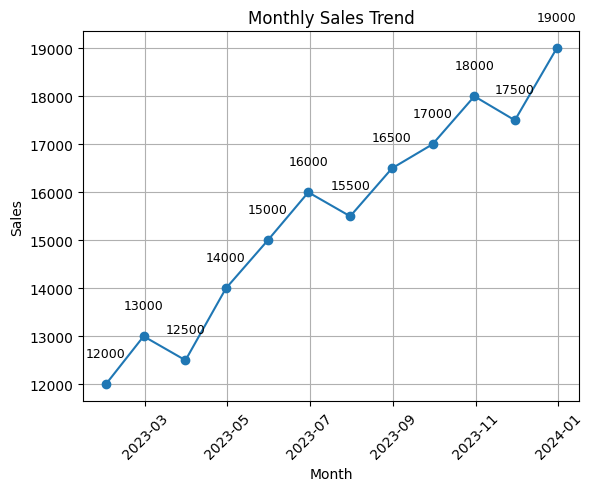

Sales started at 12000 in January and ended at 19000 in December.
The highest sales were 19000 in December, and the lowest sales were 12000 in January.
The average monthly sales for the year were 15500.00.
The overall sales trend shows consistent growth with minor dips.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000]
})

# Plot
plt.plot(df['Month'], df['Sales'], marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each point with the corresponding sales value, adding more space between the plot and the text
for i in range(len(df)):
    plt.text(df['Month'][i], df['Sales'][i] + 500, str(df['Sales'][i]),  # Increase space to 500
             ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()

# Summarization
start_sales = df['Sales'].iloc[0]
end_sales = df['Sales'].iloc[-1]
max_sales = df['Sales'].max()
min_sales = df['Sales'].min()
max_month = df.loc[df['Sales'].idxmax(), 'Month'].strftime('%B')
min_month = df.loc[df['Sales'].idxmin(), 'Month'].strftime('%B')
average_sales = df['Sales'].mean()

# Print summary
print(f"Sales started at {start_sales} in January and ended at {end_sales} in December.")
print(f"The highest sales were {max_sales} in {max_month}, and the lowest sales were {min_sales} in {min_month}.")
print(f"The average monthly sales for the year were {average_sales:.2f}.")
print("The overall sales trend shows consistent growth with minor dips.")


# Market Reactions to Events

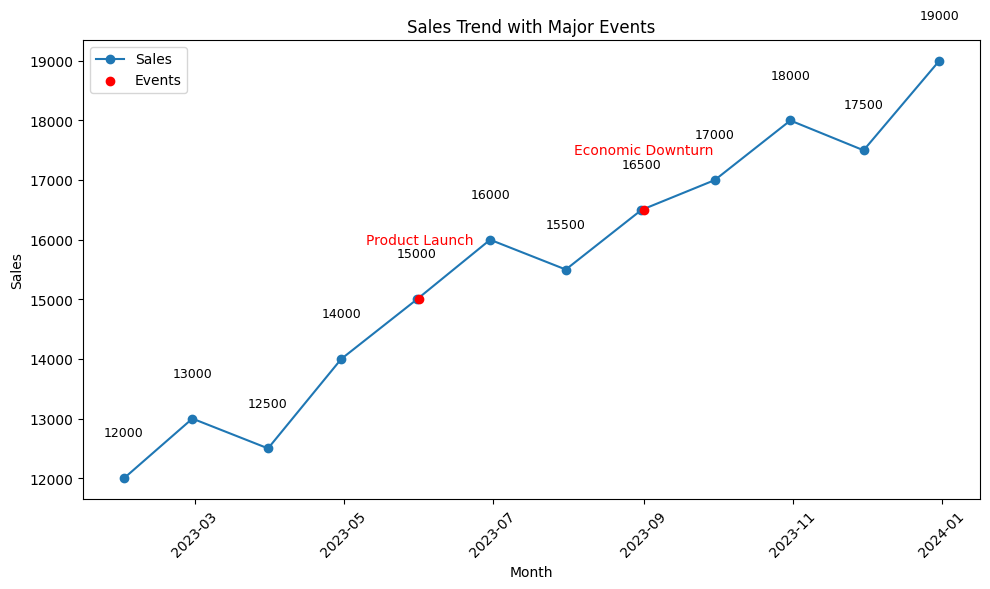

Resulting Plot:

 Line Plot: 

 The line plot shows the sales trend over time.

 Scatter Plot: 

 Scatter Points: Red points indicate the event dates plotted on the sales trend, showing where major events fall in relation to the sales trend.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with events
events = {
    'Event': ['Product Launch', 'Economic Downturn'],
    'Date': [pd.Timestamp('2023-06-01'), pd.Timestamp('2023-09-01')]
}

# Sample sales data
data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000]
})

# Plot the sales trend
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Sales'], marker='o', label='Sales', zorder=3)

# Add sales values as text labels on the line plot with more space
for i, value in enumerate(data['Sales']):
    plt.text(data['Month'][i], data['Sales'][i] + 700, f'{value}', ha='center', fontsize=9)  # Increased offset to 700

# Handle cases where 'Date' is not in data['Month'] and find closest sales values
event_sales = []
for date in events['Date']:
    closest_date = min(data['Month'], key=lambda d: abs(d - date))
    event_sales.append(data.loc[data['Month'] == closest_date, 'Sales'].values[0])

# Plot events as scatter points
plt.scatter(events['Date'], event_sales, color='red', label='Events', zorder=5)

# Annotate each event with more space from the scatter points
for i, event in enumerate(events['Event']):
    plt.annotate(event, (events['Date'][i], event_sales[i]),
                 textcoords="offset points", xytext=(0, 40), ha='center', fontsize=10, color='red')  # Increased vertical offset to 40

# Add labels, title, and formatting
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend with Major Events')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

print("Resulting Plot:")
print("\n Line Plot: ")
print("\n The line plot shows the sales trend over time.")
print("\n Scatter Plot: ")
print("\n Scatter Points: Red points indicate the event dates plotted on the sales trend, showing where major events fall in relation to the sales trend.")


# Scenario Analysis

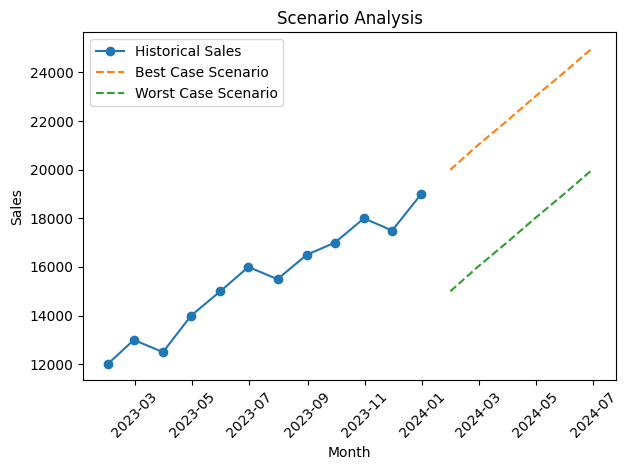

Historical sales started at 12000 in January 2023 and ended at 19000 in December 2023.
The average monthly sales for 2023 were 15500.00.
In the Best Case scenario for the first half of 2024, sales are projected to start at 20000 and end at 25000.
In the Worst Case scenario, sales are projected to start at 15000 and end at 20000.
The analysis indicates a significant growth potential in the Best Case scenario compared to historical sales.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample historical sales data (for context)
data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000]
})

# Sample scenario data
scenario_data = {
    'Month': pd.date_range(start='2024-01-01', periods=6, freq='M'),
    'Best Case': [20000, 21000, 22000, 23000, 24000, 25000],
    'Worst Case': [15000, 16000, 17000, 18000, 19000, 20000]
}

scenario_df = pd.DataFrame(scenario_data)

# Plot the historical sales
plt.plot(data['Month'], data['Sales'], label='Historical Sales', marker='o')

# Plot the scenario cases
plt.plot(scenario_df['Month'], scenario_df['Best Case'], label='Best Case Scenario', linestyle='--')
plt.plot(scenario_df['Month'], scenario_df['Worst Case'], label='Worst Case Scenario', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Scenario Analysis')
plt.xticks(rotation=45)
plt.legend()  # Automatically generates a legend

# Display the plot
plt.tight_layout()
plt.show()

# Summarization
historical_start_sales = data['Sales'].iloc[0]
historical_end_sales = data['Sales'].iloc[-1]
average_historical_sales = data['Sales'].mean()

best_case_start = scenario_df['Best Case'].iloc[0]
best_case_end = scenario_df['Best Case'].iloc[-1]
worst_case_start = scenario_df['Worst Case'].iloc[0]
worst_case_end = scenario_df['Worst Case'].iloc[-1]

# Print summary
print(f"Historical sales started at {historical_start_sales} in January 2023 and ended at {historical_end_sales} in December 2023.")
print(f"The average monthly sales for 2023 were {average_historical_sales:.2f}.")
print(f"In the Best Case scenario for the first half of 2024, sales are projected to start at {best_case_start} and end at {best_case_end}.")
print(f"In the Worst Case scenario, sales are projected to start at {worst_case_start} and end at {worst_case_end}.")
print("The analysis indicates a significant growth potential in the Best Case scenario compared to historical sales.")


In [ ]:
!pip install pandas numpy statsmodels matplotlib


# Analyze and Calculate Profit

In [ ]:
import pandas as pd

# Sample sales data with 'Sales' and 'Cost' included
data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000],
    'Cost': [1000, 1100, 1050, 1200, 1300, 1400, 1350, 1450, 1500, 1600, 1550, 1700]  # Cost data
})

# Calculate 'Profit' as the difference between 'Sales' and 'Cost'
data['Profit'] = data['Sales'] - data['Cost']

# Display the updated dataset with 'Sales', 'Cost', and 'Profit'
print(data.head())

# Ensure 'Month' is in the correct datetime format (already in this case)
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as index for easier time series analysis
data.set_index('Month', inplace=True)

# Store the modified DataFrame in a new variable if needed
df = data

# Optionally, print the modified DataFrame
print(df)


       Month  Sales  Cost  Profit
0 2023-01-31  12000  1000   11000
1 2023-02-28  13000  1100   11900
2 2023-03-31  12500  1050   11450
3 2023-04-30  14000  1200   12800
4 2023-05-31  15000  1300   13700
            Sales  Cost  Profit
Month                          
2023-01-31  12000  1000   11000
2023-02-28  13000  1100   11900
2023-03-31  12500  1050   11450
2023-04-30  14000  1200   12800
2023-05-31  15000  1300   13700
2023-06-30  16000  1400   14600
2023-07-31  15500  1350   14150
2023-08-31  16500  1450   15050
2023-09-30  17000  1500   15500
2023-10-31  18000  1600   16400
2023-11-30  17500  1550   15950
2023-12-31  19000  1700   17300


# Visualize Sales, Cost, and Profit Over Time


Original Data:
        Month  Sales  Cost  Profit
0  2023-01-31  12000  1000   11000
1  2023-02-28  13000  1100   11900
2  2023-03-31  12500  1050   11450
3  2023-04-30  14000  1200   12800
4  2023-05-31  15000  1300   13700
5  2023-06-30  16000  1400   14600
6  2023-07-31  15500  1350   14150
7  2023-08-31  16500  1450   15050
8  2023-09-30  17000  1500   15500
9  2023-10-31  18000  1600   16400
10 2023-11-30  17500  1550   15950
11 2023-12-31  19000  1700   17300


<ipython-input-31-74022997a8ae>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data.index[i], data['Sales'][i] + 200, str(data['Sales'][i]), ha='center', fontsize=9, color='blue')
<ipython-input-31-74022997a8ae>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data.index[i], data['Cost'][i] + 200, str(data['Cost'][i]), ha='center', fontsize=9, color='red')
<ipython-input-31-74022997a8ae>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

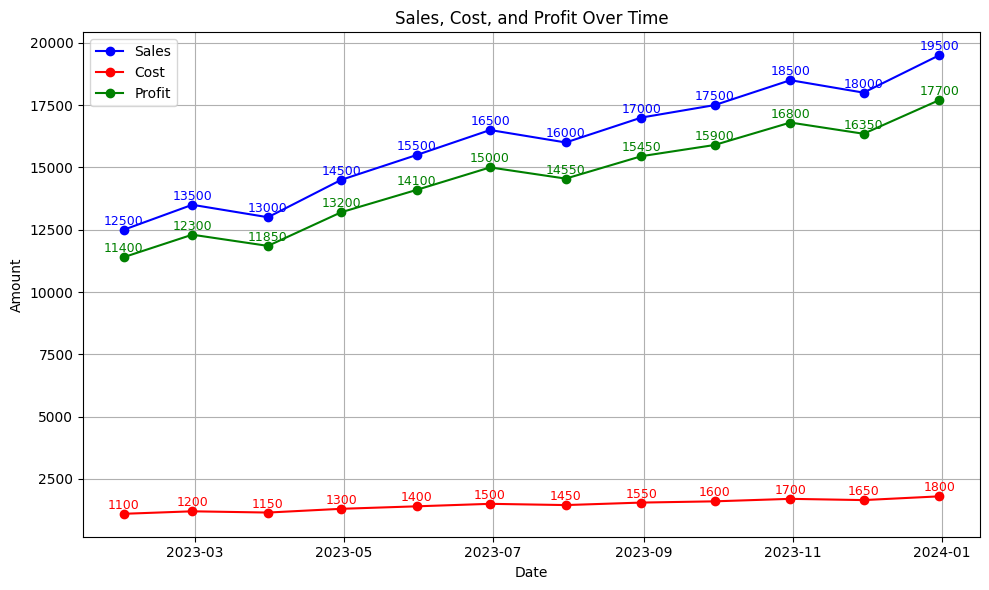


--- Summary of Sales, Cost, and Profit ---
Total Sales: 192000
Total Cost: 17400
Total Profit: 174600
Average Monthly Sales: 16000.00
Average Monthly Cost: 1450.00
Average Monthly Profit: 14550.00
The above visualization shows the updated Sales, Cost, and Profit over time.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample sales data with 'Sales' and 'Cost' included
data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000],
    'Cost': [1000, 1100, 1050, 1200, 1300, 1400, 1350, 1450, 1500, 1600, 1550, 1700]  # Initial Cost data
})

# Calculate 'Profit'
data['Profit'] = data['Sales'] - data['Cost']

# Display the original dataset
print("Original Data:")
print(data)

# Update Sales and Cost from the dataset (example new values)
data['Sales'] = [12500, 13500, 13000, 14500, 15500, 16500, 16000, 17000, 17500, 18500, 18000, 19500]  # Updated Sales
data['Cost'] = [1100, 1200, 1150, 1300, 1400, 1500, 1450, 1550, 1600, 1700, 1650, 1800]  # Updated Cost

# Recalculate 'Profit' after updating Sales and Cost
data['Profit'] = data['Sales'] - data['Cost']

# Set 'Month' as the index for easier plotting
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot Sales, Cost, and Profit over time
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales', color='blue', marker='o')
plt.plot(data['Cost'], label='Cost', color='red', marker='o')
plt.plot(data['Profit'], label='Profit', color='green', marker='o')

# Add annotations for each point
for i in range(len(data)):
    plt.text(data.index[i], data['Sales'][i] + 200, str(data['Sales'][i]), ha='center', fontsize=9, color='blue')
    plt.text(data.index[i], data['Cost'][i] + 200, str(data['Cost'][i]), ha='center', fontsize=9, color='red')
    plt.text(data.index[i], data['Profit'][i] + 200, str(data['Profit'][i]), ha='center', fontsize=9, color='green')

# Add title and labels
plt.title('Sales, Cost, and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summarization
total_sales = data['Sales'].sum()
total_cost = data['Cost'].sum()
total_profit = data['Profit'].sum()
average_sales = data['Sales'].mean()
average_cost = data['Cost'].mean()
average_profit = data['Profit'].mean()

# Print summary
print("\n--- Summary of Sales, Cost, and Profit ---")
print(f"Total Sales: {total_sales}")
print(f"Total Cost: {total_cost}")
print(f"Total Profit: {total_profit}")
print(f"Average Monthly Sales: {average_sales:.2f}")
print(f"Average Monthly Cost: {average_cost:.2f}")
print(f"Average Monthly Profit: {average_profit:.2f}")
print("The above visualization shows the updated Sales, Cost, and Profit over time.")


# Summarize the Profit (Total and Average)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample sales data with 'Sales' and 'Cost' included
data = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [12000, 13000, 12500, 14000, 15000, 16000, 15500, 16500, 17000, 18000, 17500, 19000],
    'Cost': [1000, 1100, 1050, 1200, 1300, 1400, 1350, 1450, 1500, 1600, 1550, 1700]  # Initial Cost data
})

# Calculate 'Profit'
data['Profit'] = data['Sales'] - data['Cost']

# Update Sales and Cost from the dataset (example new values)
data['Sales'] = [12500, 13500, 13000, 14500, 15500, 16500, 16000, 17000, 17500, 18500, 18000, 19500]  # Updated Sales
data['Cost'] = [1100, 1200, 1150, 1300, 1400, 1500, 1450, 1550, 1600, 1700, 1650, 1800]  # Updated Cost

# Recalculate 'Profit' after updating Sales and Cost
data['Profit'] = data['Sales'] - data['Cost']

# Set 'Month' as the index for easier plotting
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Calculate total sales, cost, and profit
total_sales = data['Sales'].sum()
total_cost = data['Cost'].sum()
total_profit = data['Profit'].sum()

# Calculate average monthly profit if the data is monthly
average_profit = data['Profit'].mean()

# Print summary statistics
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Cost: ${total_cost:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit: ${average_profit:,.2f}")


Total Sales: $192,000.00
Total Cost: $17,400.00
Total Profit: $174,600.00
Average Profit: $14,550.00


# Forecast Future Profit (Using Forecasted Sales and Cost)

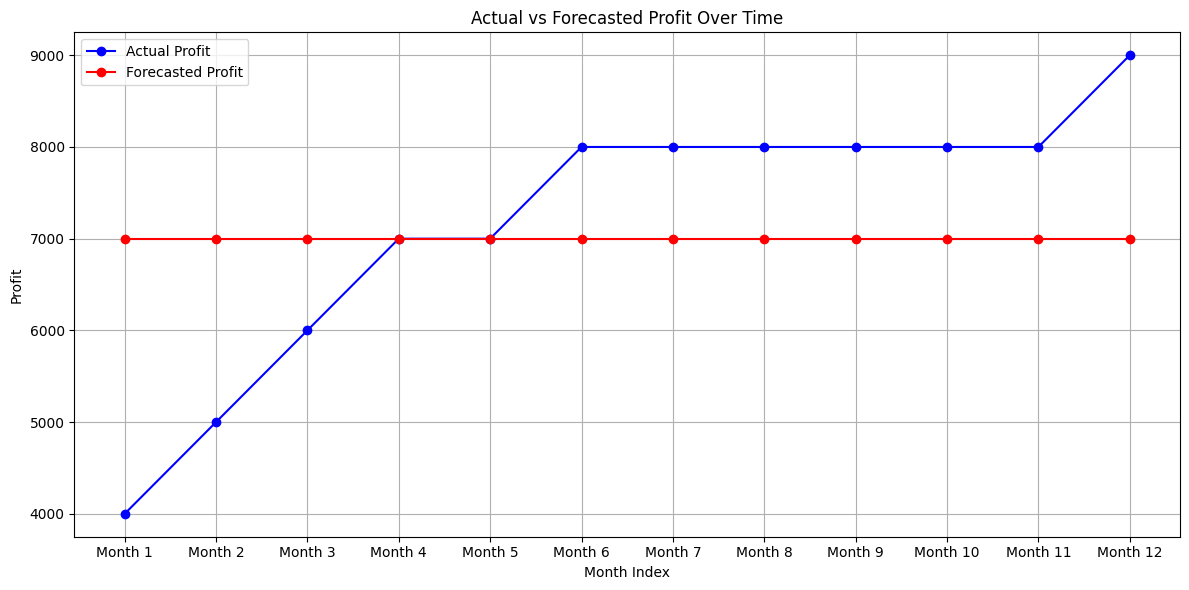


--- Summary of Actual and Forecasted Profit ---
Total Actual Profit: $86,000.00
Average Actual Profit: $7,166.67
Total Forecasted Profit: $84,000.00
Average Forecasted Profit: $7,000.00
The above visualization compares actual profit with forecasted profit over the specified months.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'Sales': [10000, 12000, 15000, 18000, 20000, 22000, 25000, 28000, 30000, 32000, 35000, 40000],
    'Cost': [6000, 7000, 9000, 11000, 13000, 14000, 17000, 20000, 22000, 24000, 27000, 31000],
})

# Calculate initial Profit
data['Profit'] = data['Sales'] - data['Cost']

# Add forecasted sales and cost (replace this with your actual forecasted values)
data['Forecasted_Sales'] = [42000, 45000, 48000, 51000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]
data['Forecasted_Cost'] = [35000, 38000, 41000, 44000, 48000, 53000, 58000, 63000, 68000, 73000, 78000, 83000]

# Now, calculate and visualize forecasted profit
data['Forecasted_Profit'] = data['Forecasted_Sales'] - data['Forecasted_Cost']

# Plot actual and forecasted profit
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Profit'], label='Actual Profit', color='blue', marker='o')
plt.plot(data.index, data['Forecasted_Profit'], label='Forecasted Profit', color='red', marker='o')
plt.title('Actual vs Forecasted Profit Over Time')
plt.xlabel('Month Index')
plt.ylabel('Profit')
plt.xticks(ticks=data.index, labels=[f'Month {i+1}' for i in data.index])  # Custom X-ticks for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate total and average forecasted profit
total_forecasted_profit = data['Forecasted_Profit'].sum()
average_forecasted_profit = data['Forecasted_Profit'].mean()

# Calculate total and average actual profit
total_actual_profit = data['Profit'].sum()
average_actual_profit = data['Profit'].mean()

# Print summary statistics
print("\n--- Summary of Actual and Forecasted Profit ---")
print(f"Total Actual Profit: ${total_actual_profit:,.2f}")
print(f"Average Actual Profit: ${average_actual_profit:,.2f}")
print(f"Total Forecasted Profit: ${total_forecasted_profit:,.2f}")
print(f"Average Forecasted Profit: ${average_forecasted_profit:,.2f}")
print("The above visualization compares actual profit with forecasted profit over the specified months.")


# RandomForestRegressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
import io

# Get the correct key from the uploaded dictionary
correct_key = list(uploaded.keys())[0]  # Assuming there's only one file uploaded

# Use the correct key to access the file content
df = pd.read_csv(io.BytesIO(uploaded[correct_key]), encoding='latin-1')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
3          6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
4         11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
...      ...             ...         ...         ...             ...   
2116    9963  CA-2015-168088   3/19/2015   3/22/2015     First Class   
2117    9965  CA-2016-146374   12/5/2016  12/10/2016    Second Class   
2118    9981  US-2015-151435    9/6/2015    9/9/2015    Second Class   
2119    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
2120    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1  

In [ ]:
# Assuming df is your DataFrame
X = df.iloc[:,1:2].values  #features
y = df.iloc[:,2].values  # Target variable

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import io

# Load the dataset
# Get the correct key from the uploaded dictionary
correct_key = list(uploaded.keys())[0]  # Assuming there's only one file uploaded

# Use the correct key to access the file content
df = pd.read_csv(io.BytesIO(uploaded[correct_key]), encoding='latin-1')

# Define features (X) and target (y)
X = df.drop('Sales', axis=1)  # Replace 'target_column' with 'Sales'
y = df['Sales']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values for numerical features only
numerical_cols = X_train.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Optionally: Handle categorical features with one-hot encoding or other methods
# ...

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

# Check if the target variable exists
X = df.drop('Profit', axis=1)
y = df['Profit']

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"Random Forest Regressor Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Random Forest Regressor Results:
R² Score: 0.8464
Mean Squared Error (MSE): 2747.9940
Root Mean Squared Error (RMSE): 52.4213
Mean Absolute Error (MAE): 23.6663


#KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor

# Load your dataset
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

# Check if the target variable exists
X = df.drop('Profit', axis=1)
y = df['Profit']

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Grid search for KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Evaluate best KNN
best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"K-Neighbors Regressor Results:")
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
K-Neighbors Regressor Results:
Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
R² Score: 0.5504
Mean Squared Error (MSE): 8043.3085
Root Mean Squared Error (RMSE): 89.6845
Mean Absolute Error (MAE): 41.9097


# support vector regressor

In [ ]:
import pandas as pd
from sklearn.svm import SVR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR

# Load your dataset
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

# Check if the target variable exists
X = df.drop('Profit', axis=1)
y = df['Profit']

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Grid search for Support Vector Regressor
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svr = SVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train, y_train)

# Evaluate best SVR
best_svr = grid_search_svr.best_estimator_
y_pred = best_svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"Support Vector Regressor Results:")
print(f"Best Parameters: {grid_search_svr.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Support Vector Regressor Results:
Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'poly'}
R² Score: 0.7465
Mean Squared Error (MSE): 4535.1031
Root Mean Squared Error (RMSE): 67.3432
Mean Absolute Error (MAE): 37.9272


# comparision of three algorithms

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Load your dataset
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

# Check if the target variable exists in the DataFrame
if 'Profit' in df.columns:
    X = df.drop('Profit', axis=1)  # Features
    y = df['Profit']  # Target variable
else:
    raise ValueError("The 'Profit' column is not found in the dataset.")

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection: Select top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Dictionary to store model results
results = {}

# Function to evaluate models
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {
        'R² Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }
    print(f"{name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("\n")

# 1. Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest Regressor", random_forest)

# 2. K-Neighbors Regressor (with grid search for hyperparameter tuning)
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
evaluate_model("K-Neighbors Regressor", best_knn)

# 3. Support Vector Regressor (with grid search for hyperparameter tuning)
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svr = SVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_
evaluate_model("Support Vector Regressor", best_svr)

# Final Comparison
print("Final Comparison of Models:")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

# Determine the best model based on R² Score
best_model = comparison_df['R² Score'].idxmax()
best_score = comparison_df['R² Score'].max()

print(f"\nThe best model for forecasting is: {best_model} with an R² score of {best_score:.4f}")


Random Forest Regressor Results:
R² Score: 0.8464
Mean Squared Error (MSE): 2747.9940
Root Mean Squared Error (RMSE): 52.4213
Mean Absolute Error (MAE): 23.6663


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
K-Neighbors Regressor Results:
R² Score: 0.5504
Mean Squared Error (MSE): 8043.3085
Root Mean Squared Error (RMSE): 89.6845
Mean Absolute Error (MAE): 41.9097


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Support Vector Regressor Results:
R² Score: 0.7465
Mean Squared Error (MSE): 4535.1031
Root Mean Squared Error (RMSE): 67.3432
Mean Absolute Error (MAE): 37.9272


Final Comparison of Models:
                          R² Score          MSE       RMSE        MAE
Random Forest Regressor   0.846378  2747.994048  52.421313  23.666344
K-Neighbors Regressor     0.550353  8043.308523  89.684494  41.909656
Support Vector Regressor  0.746473  4535.103088  67.343174  37.927212

The best model for forecasting is: Random Forest Regressor with an R² score 